In [104]:
%pylab inline
import pandas as pd
from scipy import stats, interpolate
import statsmodels.api as sm
polyfit = np.polynomial.polynomial.polyfit

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
data = pd.read_csv('./June29outs/1_0_1_outs/pipe_out_Wed_Jun_29_11_54_28_2016/statistics.csv')

In [105]:
sample_sizes = np.unique(data.sample_size.values)
slopes = []
errors = []
ses = []
for s in sample_sizes:
    subsample = data[data['sample_size'] == s]
    print('samplesize:',s)
    print('numberofpoints',subsample.shape[0])
    slope, intercept, r_value, p_value, std_err = stats.linregress(subsample['distance_to_COM'], subsample['unique_combos'])    
    print('pvalue:',p_value)
    print('rvalue:',r_value)
    print('slope:',slope)
    print('std_err', std_err)
    print('intercept:',intercept)
    print('NEGATIVE SLOPE:',(slope<0))
    print('\n')
    slopes.append(slope)
    ses.append(s)
    errors.append(std_err)
    
slopes = np.array(slopes)
ses = np.array(ses)
errors = np.array(errors)

('samplesize:', 2)
('numberofpoints', 124)
('pvalue:', 0.15381695102491991)
('rvalue:', -0.12884497923941171)
('slope:', -0.0004316517862497957)
('std_err', 0.00030078141774425094)
('intercept:', 1.9089775699200517)
('NEGATIVE SLOPE:', True)


('samplesize:', 3)
('numberofpoints', 118)
('pvalue:', 0.24095263530309521)
('rvalue:', -0.10878474865015389)
('slope:', -0.00044754507974519719)
('std_err', 0.00037971233584514042)
('intercept:', 2.6103743813128673)
('NEGATIVE SLOPE:', True)


('samplesize:', 4)
('numberofpoints', 85)
('pvalue:', 0.13200568925443773)
('rvalue:', -0.16469530693655032)
('slope:', -0.00091209693825168201)
('std_err', 0.0005995830558454306)
('intercept:', 3.2588422680572497)
('NEGATIVE SLOPE:', True)


('samplesize:', 5)
('numberofpoints', 82)
('pvalue:', 0.0012997686167119942)
('rvalue:', -0.34925817741496373)
('slope:', -0.0026076364546998277)
('std_err', 0.00078218116900637222)
('intercept:', 4.6230508514700901)
('NEGATIVE SLOPE:', True)


('samplesize:', 6)
('nu

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.692
Model:                            WLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     42.62
Date:                Mon, 04 Jul 2016   Prob (F-statistic):           2.98e-06
Time:                        15:55:40   Log-Likelihood:                   -inf
No. Observations:                  20   AIC:                               inf
Df Residuals:                      19   BIC:                               inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0003    4.6e-05     -6.528      0.0

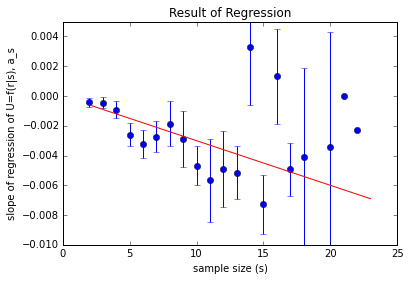

In [124]:
nanloc = np.isfinite(slopes)
slopes = slopes[nanloc]
ses = ses[nanloc]
errors = errors[nanloc]
plt.errorbar(ses, slopes,yerr=errors,fmt='o')
plt.xlabel('sample size (s)')
plt.ylabel('slope of regression of U=f(r|s), a_s')
# slope, intercept, r_value, p_value, std_err = stats.linregress(ses, slopes)
# weights = 1/(errors**2)
weights = 1/(errors)
weights[np.isnan(weights)] = 0
sm.tools.add_constant(slopes)
mod_wls = sm.WLS(slopes,ses,weights=weights,)
res_wls = mod_wls.fit()
print(res_wls.summary())
sss = np.linspace(2,23,25)
plt.plot(sss,res_wls.predict(sss),'r')
plt.ylim([-0.01, 0.005])
plt.title('Result of Regression')

In [125]:
res_wls.pvalues

array([  2.97779747e-06])

In [126]:
stats.binom_test(np.sum(slopes<0),n=slopes.shape[0])

0.0025768280029296871